In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [67]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
!pip install pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install langdetect
import nltk
nltk.download('vader_lexicon')
from langdetect import detect  
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [68]:
# Authentication

consumerKey = ''
consumerSecret = ''
accessToken = ''
accessTokenSecret = ''

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [119]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


Please enter keyword or hashtag to search: layoffs
Please enter how many tweets to analyze: 180


In [120]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number:" , len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  180
positive number:  75
negative number: 60
neutral number:  45


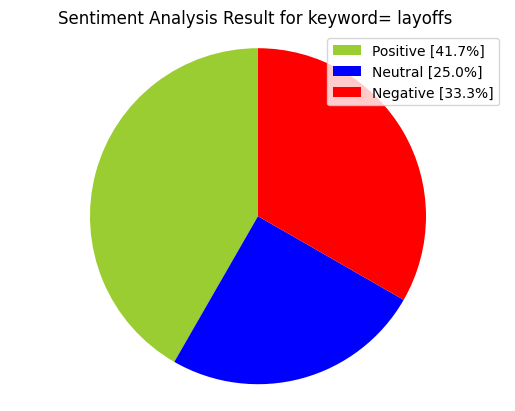

In [121]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+' ')
plt.axis('equal')
plt.show()

In [122]:
tweet_list.drop_duplicates(inplace = True)

In [123]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,The @DroppedFrames cameras froze due to techni...,The @DroppedFrames cameras froze due to techni...
1,"RT @ClayTravis: Good argument, Stan. When all ...","RT @ClayTravis: Good argument, Stan. When all ..."
2,RT @Kengriffey20: @stanverrett @megynkelly @Cl...,RT @Kengriffey20: @stanverrett @megynkelly @Cl...
4,The Economy Gets Wrung Out https://t.co/ZNO5np...,The Economy Gets Wrung Out https://t.co/ZNO5np...
5,"4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ...","4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ..."
...,...,...
173,"RT @arstechnica: For over two decades, DPRevie...","RT @arstechnica: For over two decades, DPRevie..."
175,"The job market is so unstable, it’s a lot of l...","The job market is so unstable, it’s a lot of l..."
176,@HarmlessYardDog In other news... https://t.co...,@HarmlessYardDog In other news... https://t.co...
177,@mturkmenn27 @birlesiktekstil existing legisla...,@mturkmenn27 @birlesiktekstil existing legisla...


In [124]:
tweet_list

,0,text
0,The @DroppedFrames cameras froze due to techni...,The @DroppedFrames cameras froze due to techni...
1,"RT @ClayTravis: Good argument, Stan. When all ...","RT @ClayTravis: Good argument, Stan. When all ..."
2,RT @Kengriffey20: @stanverrett @megynkelly @Cl...,RT @Kengriffey20: @stanverrett @megynkelly @Cl...
4,The Economy Gets Wrung Out https://t.co/ZNO5np...,The Economy Gets Wrung Out https://t.co/ZNO5np...
5,"4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ...","4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ..."
...,...,...
173,"RT @arstechnica: For over two decades, DPRevie...","RT @arstechnica: For over two decades, DPRevie..."
175,"The job market is so unstable, it’s a lot of l...","The job market is so unstable, it’s a lot of l..."
176,@HarmlessYardDog In other news... https://t.co...,@HarmlessYardDog In other news... https://t.co...
177,@mturkmenn27 @birlesiktekstil existing legisla...,@mturkmenn27 @birlesiktekstil existing legisla...


In [125]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,The @DroppedFrames cameras froze due to techni...,the cameras froze due to technical issues wh...
1,"RT @ClayTravis: Good argument, Stan. When all ...",good argument stan when all the layoffs b...
2,RT @Kengriffey20: @stanverrett @megynkelly @Cl...,you re getting destroyed did you rea...
4,The Economy Gets Wrung Out https://t.co/ZNO5np...,the economy gets wrung out
5,"4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ...",4 73 000 layoffs in 6 months source
6,"Hey all! In the wake of the Twitch layoffs I, ...",hey all in the wake of the twitch layoffs i ...
7,"Nolte: Woke Disney Rattled By 7,000 Coming Lay...",nolte woke disney rattled by 7 000 coming lay...
8,@stltoday @tonymess With all the layoffs at th...,with all the layoffs at the pd how does t...
9,@megynkelly @stanverrett @ClayTravis @espn I r...,i read espn was going to have major la...
10,RT @Timothy_Hughes: Today people want a compan...,today people want a company with values that...


In [126]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,The @DroppedFrames cameras froze due to techni...,the cameras froze due to technical issues wh...,-0.06250,0.2375,neutral,0.0,1.0,0.0,0.0
1,"RT @ClayTravis: Good argument, Stan. When all ...",good argument stan when all the layoffs b...,0.35000,0.3000,positive,NaN,NaN,NaN,NaN
2,RT @Kengriffey20: @stanverrett @megynkelly @Cl...,you re getting destroyed did you rea...,0.35000,0.3500,negative,NaN,NaN,NaN,NaN
4,The Economy Gets Wrung Out https://t.co/ZNO5np...,the economy gets wrung out,0.00000,0.0000,neutral,0.0,1.0,0.0,0.0
5,"4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ...",4 73 000 layoffs in 6 months source,0.00000,0.0000,neutral,0.0,1.0,0.0,0.0
6,"Hey all! In the wake of the Twitch layoffs I, ...",hey all in the wake of the twitch layoffs i ...,0.60000,0.5500,positive,NaN,NaN,NaN,NaN
7,"Nolte: Woke Disney Rattled By 7,000 Coming Lay...",nolte woke disney rattled by 7 000 coming lay...,0.00000,0.0000,neutral,0.0,1.0,0.0,0.0
8,@stltoday @tonymess With all the layoffs at th...,with all the layoffs at the pd how does t...,-0.40000,0.6000,negative,NaN,NaN,NaN,NaN
9,@megynkelly @stanverrett @ClayTravis @espn I r...,i read espn was going to have major la...,-0.01875,0.4000,neutral,0.0,1.0,0.0,0.0
10,RT @Timothy_Hughes: Today people want a compan...,today people want a company with values that...,0.00000,0.0000,positive,NaN,NaN,NaN,NaN


In [127]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [128]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])


In [129]:
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,46,39.66
neutral,39,33.62
positive,31,26.72


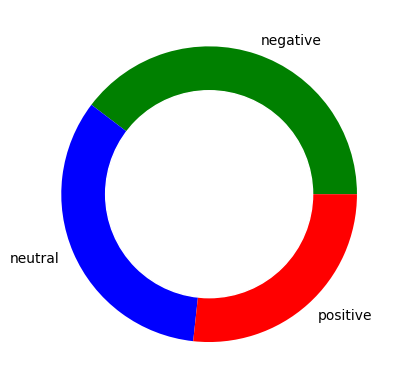

In [130]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [132]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.04
neutral,11.21
positive,17.29


In [133]:
#Removing Punctuation
import nltk
nltk.download('stopwords')
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,The @DroppedFrames cameras froze due to techni...,the cameras froze due to technical issues wh...,-0.0625,0.2375,neutral,0.0,1.0,0.0,0.0,94,15,the cameras froze due to technical issues wh...,"[the, cameras, froze, due, to, technical, issu...","[cameras, froze, due, technical, issues, talki...","[camera, froze, due, technic, issu, talk, twit..."
1,"RT @ClayTravis: Good argument, Stan. When all ...",good argument stan when all the layoffs b...,0.3500,0.3000,positive,NaN,NaN,NaN,NaN,121,24,good argument stan when all the layoffs b...,"[, good, argument, stan, when, all, the, layof...","[, good, argument, stan, layoffs, begin, woke,...","[, good, argument, stan, layoff, begin, woke, ..."
2,RT @Kengriffey20: @stanverrett @megynkelly @Cl...,you re getting destroyed did you rea...,0.3500,0.3500,negative,NaN,NaN,NaN,NaN,88,14,you re getting destroyed did you rea...,"[, you, re, getting, destroyed, did, you, real...","[, getting, destroyed, really, think, people, ...","[, get, destroy, realli, think, peopl, would, ..."
4,The Economy Gets Wrung Out https://t.co/ZNO5np...,the economy gets wrung out,0.0000,0.0000,neutral,0.0,1.0,0.0,0.0,28,5,the economy gets wrung out,"[the, economy, gets, wrung, out, ]","[economy, gets, wrung, ]","[economi, get, wrung, ]"
5,"4,73,000.. layoffs in 6 months !!🔥💥\n\nSource ...",4 73 000 layoffs in 6 months source,0.0000,0.0000,neutral,0.0,1.0,0.0,0.0,49,8,4 73 layoffs in 6 months source,"[4, 73, layoffs, in, 6, months, source, ]","[4, 73, layoffs, 6, months, source, ]","[4, 73, layoff, 6, month, sourc, ]"


In [134]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))


116 Number of tweets has 571 words


In [135]:
#print(countVectorizer.get_feature_names())1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

,,abl,accentur,accord,actual,add,administr,ado,agre,agreement,...,xp,yeah,year,yo,zachowania,zap,zaplanowan,zero,zuckerberg,zwolnienia
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
layoff,73
tech,14
job,12
compani,12
cut,10
stan,9
go,9
espn,8
announc,6
come,6


In [137]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words ='english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('tech layoffs', 5),
 ('massive layoffs', 4),
 ('job cuts', 4),
 ('think people', 3),
 ('layoffs dominating', 3),
 ('dominating headlines', 3),
 ('headlines job', 3),
 ('cuts sectors', 3),
 ('sectors proving', 3),
 ('proving just', 3),
 ('just devastating', 3),
 ('layoffs tech', 3),
 ('round layoffs', 3),
 ('espn layoffs', 3),
 ('twitch layoffs', 2),
 ('good argument', 2),
 ('argument stan', 2),
 ('stan layoffs', 2),
 ('layoffs begin', 2),
 ('begin woke', 2)]

In [138]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('tech layoffs dominating', 3),
 ('layoffs dominating headlines', 3),
 ('dominating headlines job', 3),
 ('headlines job cuts', 3),
 ('job cuts sectors', 3),
 ('cuts sectors proving', 3),
 ('sectors proving just', 3),
 ('proving just devastating', 3),
 ('good argument stan', 2),
 ('argument stan layoffs', 2),
 ('stan layoffs begin', 2),
 ('layoffs begin woke', 2),
 ('begin woke company', 2),
 ('woke company smarter', 2),
 ('company smarter man', 2),
 ('smarter man look', 2),
 ('getting destroyed did', 2),
 ('destroyed did really', 2),
 ('did really think', 2),
 ('really think people', 2)]